<a href="https://colab.research.google.com/github/niyatiiii28/ES666-CV/blob/main/Copy_of_Assignment1_ES666_The_Chamber_of_Singular_Truths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 Welcome to the Order of Visioneers


You are a new intern in the ancient Order of Visioneers — a secret society tasked with recovering lost knowledge encoded in ancient visual artifacts. The Grand Archivist tells you:

> The Great Archive has been corrupted. Our only hope is to decode and reconstruct the fragments using the Algorithms of Sight. Only those who pass through the Five Gates may restore the World of Vision

But the Archivist also warns:

> Beware, interns. Those who attempt to pass the Gates with borrowed visions or false answers are cursed. Their sight is clouded, their names erased from the Hall of Records, and they are cast forever into the Void of Zero — where no Visioneer has honor, nor power. Only true effort unlocks the path.

You must pass through five gates, each guarded by a unique challenge — and each challenge maps to your assignments. Let's depart for the ***Gate 1***.

# 🌀 Gate 1 : The Chamber of Singular Truths

Theme: SVD, Image Reconstruction, Background-Foreground Separation

Deep in the archives lies a corrupted portrait of the First Visioneer. The portrait has lots of unnecessary elements and distraction. To pass the gate, you must:

> Decompose the portrait into its elemental forms, reconstruct what once was but with necessary elements only.

Run the following code to setup the assignment

In [ ]:
## Importing recipes
%matplotlib inline

import requests
from io import BytesIO
import imageio
import numpy as np
import imageio.v3 as imageio
import moviepy.editor as mpe
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.animation as animation
from moviepy.editor import ImageSequenceClip

# Mounting google drive
drive.mount('/content/drive')


## Making recipes
video = mpe.VideoFileClip("/content/drive/My Drive/ES666CV/video/A/input.mp4")

def video_to_array(video):
    frames = np.array([rgb2gray(frame) for frame in video.iter_frames()])
    return frames
def array_to_video(images):
    fig, ax = plt.subplots()
    width, height = 320, 240   # pixels
    dpi = 200                  # dots per inch
    fig.set_size_inches(width / dpi, height / dpi)
    ax.axis('off')  # Remove axes
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    im = ax.imshow(images[0], cmap='gray', vmin=0, vmax=1)  # Initial frame

    def update(frame):
        im.set_array(images[frame])
        return [im]

    ani = animation.FuncAnimation(fig, update, frames=len(images), interval=1000/25)  # ~25 fps

    # Save as MP4 (requires FFmpeg; alternatively save as GIF with writer='pillow')
    ani.save('temp.mp4', writer='ffmpeg', fps=25, dpi=200)
    video = mpe.VideoFileClip('temp.mp4')
    plt.close()
    return video

def display_images_in_row(images, cmap='gray'):
    fig, axs = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
    if len(images) == 1:
        axs = [axs]
    for ax, img in zip(axs, images):
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Task1: Forge the weapon - SVD (3 Marks)

Implement Singular Value Decomposition (SVD) from scratch.
You can use Numpy's Eigen Value Decomposition for your implementation.

Write your code in the commented part only

In [ ]:
def compute_svd(matrix: np.array) -> tuple:
    ## Your code here
    # u, s, v_transpose = ...
    ## Comment above statement and update your code to return decomposed matrices instead

    A=matrix #size=m*n
    m,n=A.shape

    ATA=A.T @ A

    eigen_values,eigen_vectors=np.linalg.eigh(ATA)

    #sort the eigen values in decending order and corrosponding eigen vectors
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]

    # v matrix
    V = eigen_vectors[:, idx]

    #singular values to create s matrix
    singular_vals=np.sqrt(np.maximum(eigen_values,0)) #avoid negative values

    valid_singular_vals=[]
    valid_vectors=[]

    for i in range(len(singular_vals)):
      if(singular_vals[i]>1e-10):
        valid_singular_vals.append(singular_vals[i])
        valid_vectors.append(V[:,i])

    #convert the list into array
    singular_vals=np.array(valid_singular_vals)

    #V Maxtix
    n=len(valid_vectors[0])
    r=len(valid_singular_vals)
    V=np.zeros((n,r))
    for i in range(r):
      V[:,i]=valid_vectors[i]

    #U Matrix
    U=np.zeros((m,r))
    for i in range(r):
      U[:,i]=A @ V[:,i] / singular_vals[i]

    S=np.zeros((r,r))
    for i in range(r):
      S[i,i]=singular_vals[i]

    return U,S , V.T

### Task 2: Decompose into elemental forms and reconstruct from true elements discarding unncessary elements (3 Marks)

1. Decompose image using SVD and reconstruct the image using only top $k$ singular values.
2. Experiment with different values of $k$ and visualize the results.
3. Plot reconstruction error by measuring Mean squared error between reconstructed and original image for different values of $k$.

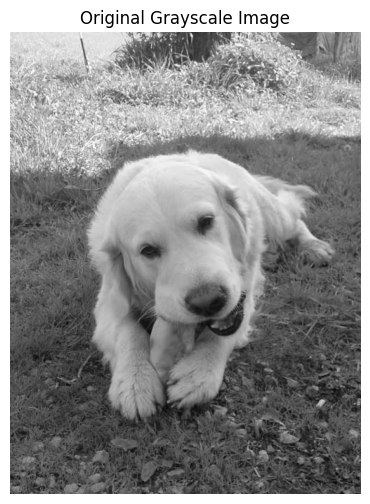

In [ ]:
import requests
from io import BytesIO
import imageio.v3 as imageio
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

url = "https://upload.wikimedia.org/wikipedia/commons/a/af/Golden_retriever_eating_pigs_foot.jpg"

# Fetch using requests
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
image = imageio.imread(BytesIO(response.content))

# Convert to grayscale
gray_image = rgb2gray(image)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()


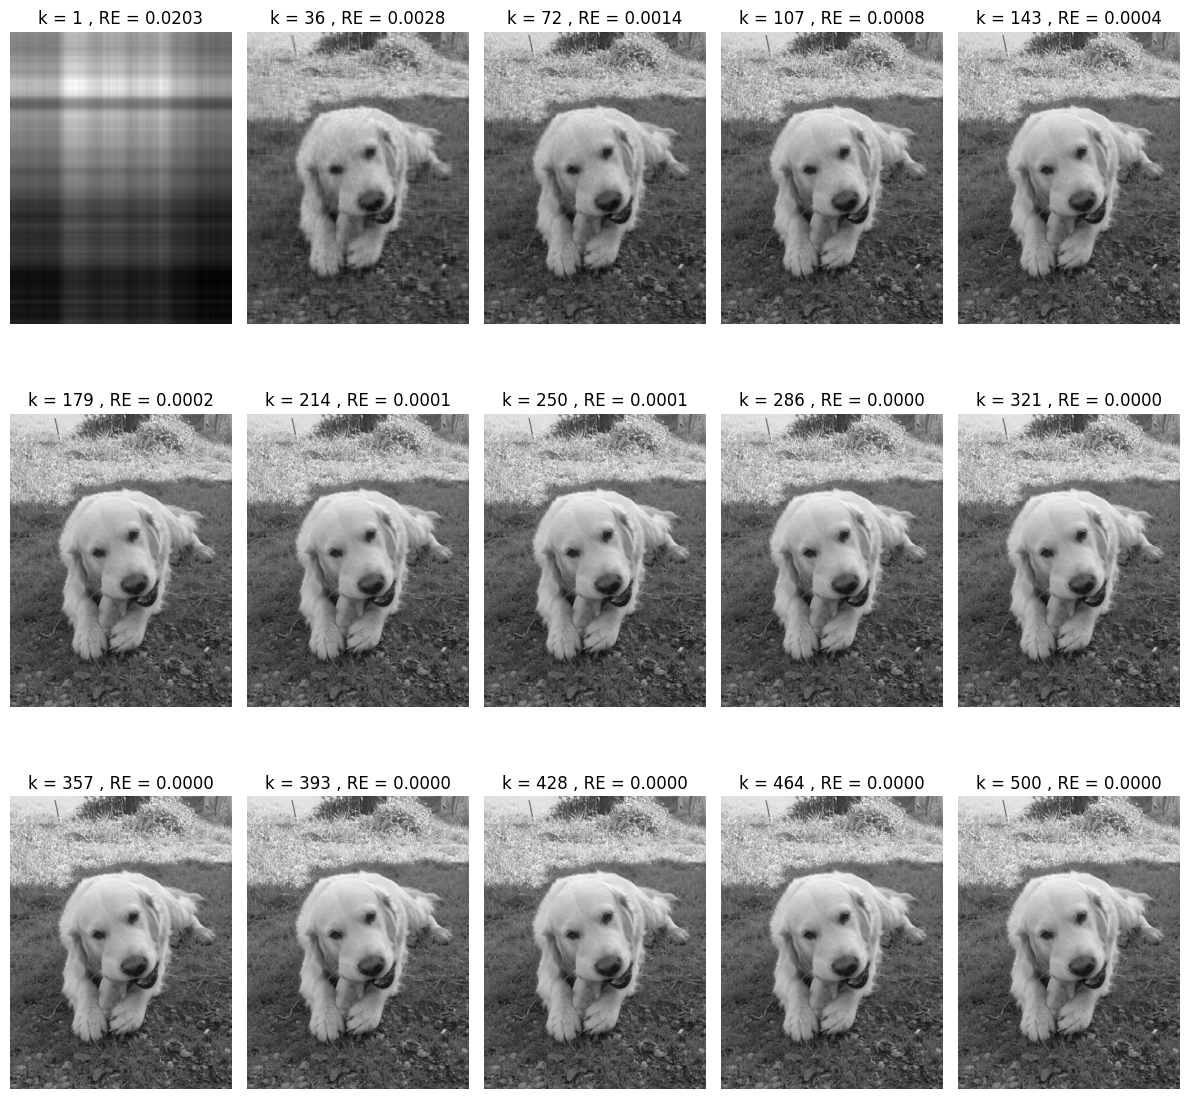

In [ ]:
def compress_image_using_topk_singular_values(image, k):
    ## Your code here
    ## comment below line and update your code to return compressed image
    # compressed_image= ...

    U, S, V_transpose = compute_svd(image)
    compressed_image = U[:, :k] @ S[:k, :k] @ V_transpose[:k,:]

    return compressed_image

def reconstruction_error(original, reconstructed):
    ## Your code here

    ## Comment below line and write your code
    mse = np.mean((original - reconstructed)**2)

    return mse

m, n = gray_image.shape
k_values = np.linspace(1, min(m, n), 15, dtype=int)  # Lets visualize 15 images
plt.figure(figsize=(12, 12))
for i, k in enumerate(k_values):
    compressed_image = compress_image_using_topk_singular_values(gray_image, k)
    re = reconstruction_error(gray_image, compressed_image)
    plt.subplot(3, 5, i + 1)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'k = {k} , RE = {re:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Reconstruction Error vs. k')

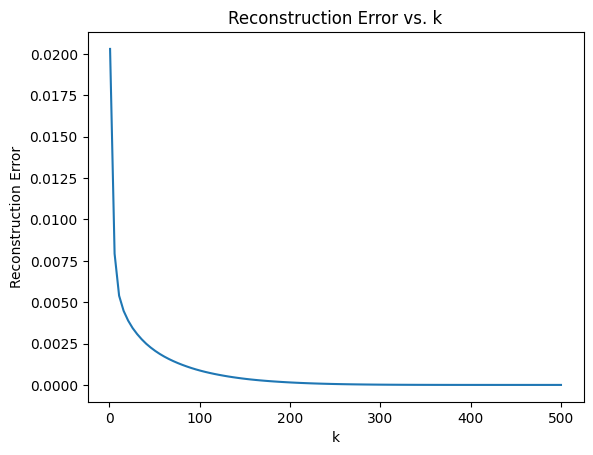

In [ ]:
# Plot Reconstruction error w.r.t. 'k'
# Lets sample more 100 k values for analysing how k affects reconstruction quality.
## Your code here for plot

U,S, V_trans= compute_svd(gray_image)
m,n=gray_image.shape

errs=[]
k_values = np.linspace(1, min(m, n), 100, dtype=int)

for i in k_values:
  compressed_image = compress_image_using_topk_singular_values(gray_image, i)
  reconstruction_err=reconstruction_error(gray_image, compressed_image)
  errs.append(reconstruction_err)

plt.plot(k_values, errs)
plt.xlabel('k')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. k')


What value of $k$ do you think is enough for the image reconstruction. What is the benefit of this method?

Answer:

From the visualization, we can see that even a small number of singular values (e.g.,𝑘 around20–50) captures most of the important image features. As 𝑘 increases, finer details are added, and the reconstruction error decreases. Beyond a certain point, increasing 𝑘
k further gives only marginal improvement in visual quality and MSE.

Why this method is beneficial:

It compresses the image by keeping only the most significant components, reducing storage and computational cost.

The top singular values capture the dominant patterns and structures in the image, while less important details (like noise) are discarded.

It provides a principled way to balance image quality and compression, and also illustrates how SVD separates strong signal (structure) from weak signal (noise or fine details).

### Task 3: Separate the truth from chaos and distraction (Marks 4)

Perform background-foreground separation using SVD.

In this task you might need help. So, the archivist called an expert who is too old to code but wise enough to guide you.

The expert will guide you and you will have to code it. First lets welcom the expert, "Prof. Dhoomketu" from Dholakpur

In [ ]:
video.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In the above video, we want to focus on the building. But, the moving cars are distracting us. We want to remove them. Follow the instruction by Prof. Dhoomketu to complete this task

***Prof. Dhoomketu***: Currently we have video frames of shape (num_frames, height, width). Write a function that transforms this tensor to matrix of shape (height, width, num_frames). Ensure that the order of the frames is preserved.

In [ ]:
frames = video_to_array(video)
def tarnsform_video_frames(frames: np.array):
    ## Write your code here
    ## frames shape: (num_frames, height, width)
    num_frames, height, width = frames.shape

    # Reshape each frame into a column vector and stack
    matrix = frames.reshape(num_frames, height * width)

    return matrix.T


***Prof. Dhoomketu***: Reconstruct the matrix using SVD with with very few of the top singular values (2 or 4 ). And rearrange the matrix to the original frame shape.

In [ ]:
## Write your code here and assign the results to the variables below based on Prof. Dhoomketu's instruction
def reconstruction(matrix,k, height, width):
    num_pixels, num_frames = matrix.shape

    #Compute SVD
    U, S , V_transpose = compute_svd(matrix)
    reconstructed_matrix= U[:,:k] @ S[:k,:k] @ V_transpose[:k, :]
    reconstructed_frames=reconstructed_matrix.T.reshape(num_frames, height, width)
    return reconstructed_matrix, reconstructed_frames

num_frames, height, width = frames.shape
matrix = tarnsform_video_frames(frames)
reconstructed_matrix ,reconstructed_frames =reconstruction(matrix,2, height, width)


***Prof. Dhoomketu***: Now visualize the first frames of the original and reconstructed videos. Just run the below code.
I have brought the visualization codes for you.

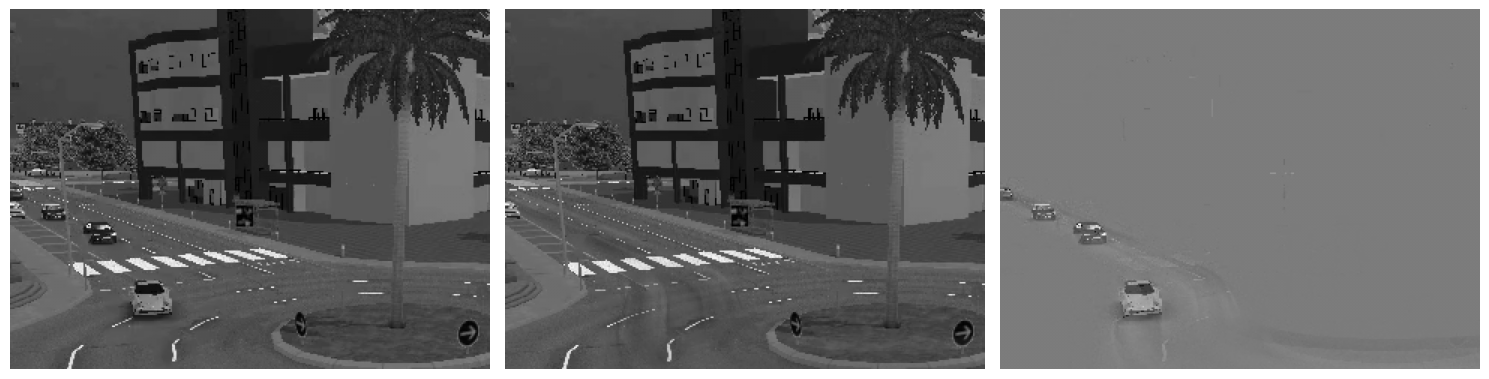

In [ ]:
display_images_in_row([frames[0], reconstructed_frames[0], frames[0] - reconstructed_frames[0]])

***Prof. Dhoomketu***: If you see that the cars are gone from the frames, it means you where able to successfully perform the separation of the distracting cars from the background.
Run the following code to visualize the separated cars from the video

In [ ]:
cars_only = frames - reconstructed_frames
cars_only = array_to_video(cars_only)
cars_only.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


***Prof. Dhoomketu***: If you where able to successfully separate the cars, congratulations! But, I want to check if you understand whats going on behind the scenes? Why do you think the SVD-based approach was effective in this case?

HINT: Complete the following code for hints. Resize the original matrix and reconstructed matrix to shape (200,200). Visualize the resized matrices to get the hint. You can use the following syntax for resizing:

resized_original = resize(original, (200,200),anti_aliasing=False)

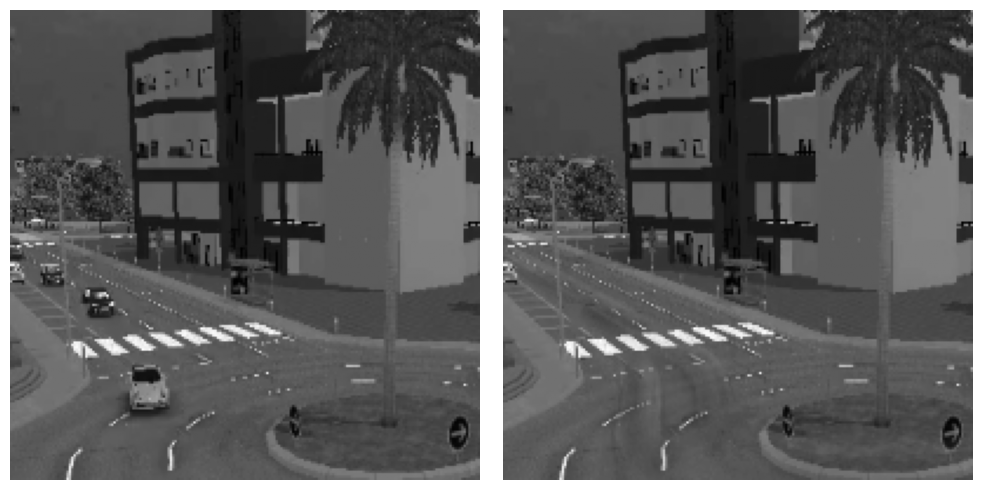

In [ ]:
# ## Write your code here
# resized_original_matrix = ...
# resized_reconstructed_matrix = ...

# display_images_in_row([resized_original_matrix, resized_reconstructed_matrix])

from skimage.transform import resize

# select any frame
frame_id = 0
original_frame = frames[frame_id]
reconstructed_frame = reconstructed_frames[frame_id]

# Resize both to 200x200
resized_original_matrix = resize(original_frame, (200, 200), anti_aliasing=False)
resized_reconstructed_matrix = resize(reconstructed_frame, (200, 200), anti_aliasing=False)

# Display side by side
display_images_in_row([resized_original_matrix, resized_reconstructed_matrix])


***Prof. Dhoomketu***: Q1: What do you observe? Answer my previous question using the observation here to complete the assignment.
Q2: Why did we resized the matrices for visualization?

Answer:

 **Q1: What do you observe?**

 when we are resizing the original frame, we are able to see both the cars(moving objects) and the static background.

On the other hand, In the reconstructed frame where we are using only 2 top singular values, the static background is saved, but the cars (moving objects) are blurred.

From this we can observe that doing background-foreground seperation using SVD effectively separates the background from the foreground. This happens because the background has its most energy across frames and that energy is captured by the top singular values, while moving objects contribute to smaller singular values only.




**Q2: Why did we resize the matrices for visualization?**

Resizing the matrices to a fixed size (200×200) makes it easier to visualize the images side by side.

It ensures consistency in display and avoids issues with very large frames, making the differences between original and reconstructed frames more noticeable.